# Import Necessary Library

In [1]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(".."))
from EDA import Exploratory


explor = Exploratory()

## Data Heterogen

In [2]:
#Importing Data Using Pandas
data = pd.read_csv(r'C:\Users\ASUS\MedCheckProject\Dataset\data_clean.csv')
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
#Checking Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.3

## Splitting Data to NUM and CAT for analysis purpose

In [4]:
data_num = data.select_dtypes(include=['number'])
data_num

,Age,Billing Amount,Room Number
0,30,18856.281306,328
1,62,33643.327287,265
2,76,27955.096079,205
3,28,37909.782410,450
4,43,14238.317814,458
...,...,...,...
54961,42,2650.714952,417
54962,61,31457.797307,316
54963,38,27620.764717,347
54964,43,32451.092358,321


In [5]:
data_cat = data.select_dtypes(exclude=['number'])
data_cat

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...
54961,eLIZABeTH jaCkSOn,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,Elective,2020-09-15,Penicillin,Abnormal
54962,KYle pEREz,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,Elective,2020-02-01,Aspirin,Normal
54963,HEATher WaNG,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,Urgent,2020-08-10,Ibuprofen,Abnormal
54964,JENniFER JOneS,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,Elective,2019-05-31,Ibuprofen,Abnormal


In [6]:
#Dropping Unnecesarry Columns
list_2_drop = ['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Discharge Date']
data_cat = data_cat.drop(list_2_drop, axis=1)
data_cat

,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results
0,Male,B-,Cancer,Urgent,Paracetamol,Normal
1,Male,A+,Obesity,Emergency,Ibuprofen,Inconclusive
2,Female,A-,Obesity,Emergency,Aspirin,Normal
3,Female,O+,Diabetes,Elective,Ibuprofen,Abnormal
4,Female,AB+,Cancer,Urgent,Penicillin,Abnormal
...,...,...,...,...,...,...
54961,Female,O+,Asthma,Elective,Penicillin,Abnormal
54962,Female,AB-,Obesity,Elective,Aspirin,Normal
54963,Female,B+,Hypertension,Urgent,Ibuprofen,Abnormal
54964,Male,O-,Arthritis,Elective,Ibuprofen,Abnormal


## Visualisasi Heterogen

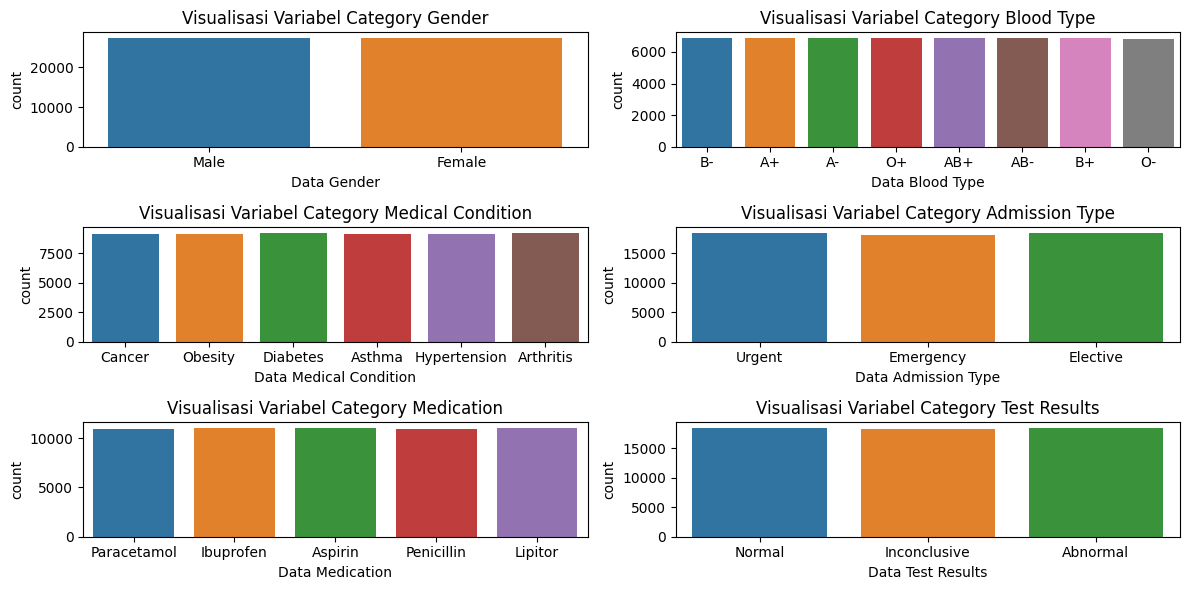

In [7]:
explor.visualcount(data_cat, 2, 3)

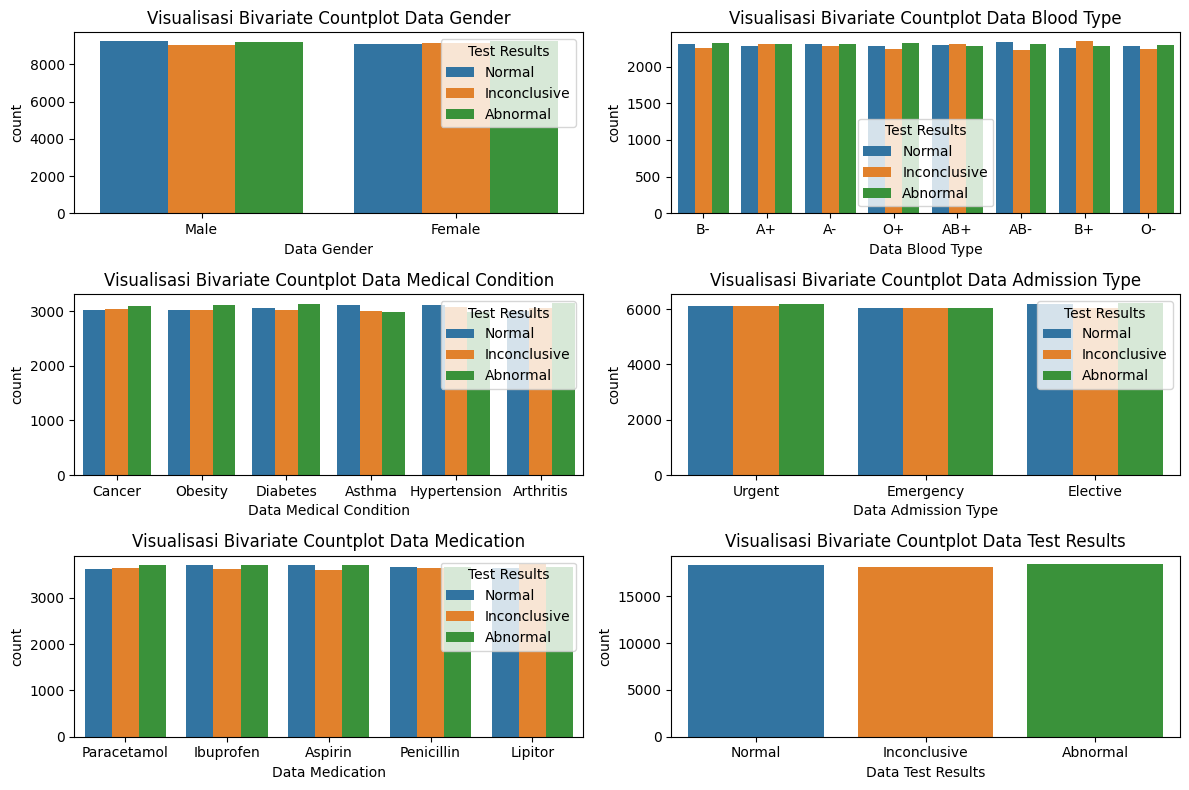

In [8]:
explor.visualcatplotdouble(data_cat, 2, 3, 'Test Results')

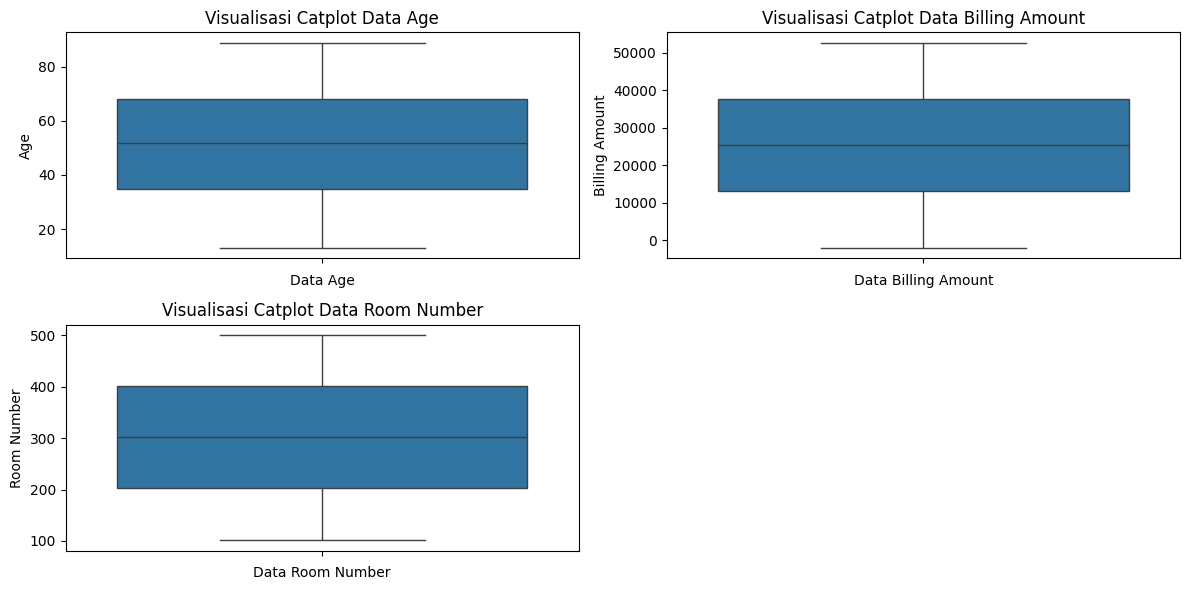

In [9]:
explor.visualcatplot(data_num, 2,2)

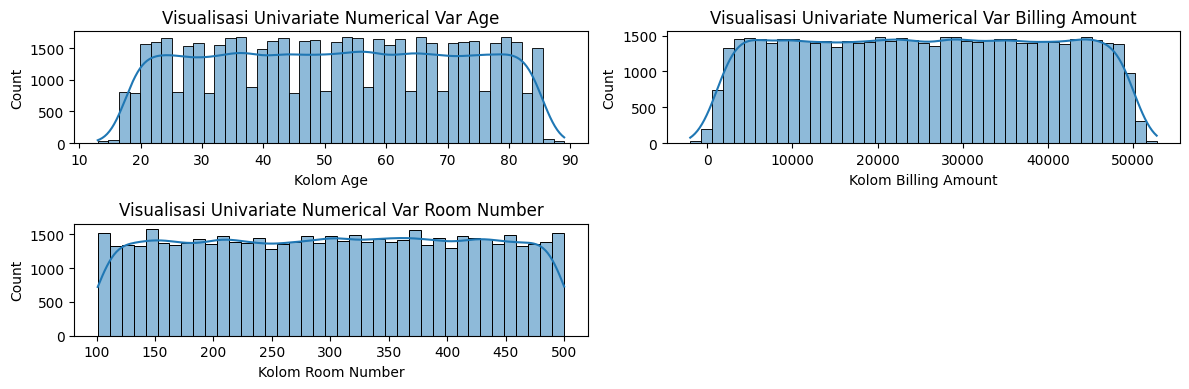

In [10]:
explor.visualnumvar(data_num, 2, 2)

# Data Homogen

In [37]:
data.loc[data.Age <= 39, 'AgeCat'] = 'Young'
data.loc[(data.Age>39) & (data.Age<=50), 'AgeCat'] = 'Adults'
data.loc[data.Age>50, 'AgeCat'] = 'Olds'

In [38]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,AgeCat
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Young
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Olds
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Olds
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Young
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,Adults
54962,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,Olds
54963,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,Young
54964,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,Adults


In [31]:
data['AgeCat'].value_counts()

AgeCat
Young Adults    54966
Name: count, dtype: int64